In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
k = tf.keras

In [116]:
x = np.linspace(0, 50, 501)

In [117]:
y = np.sin(x)

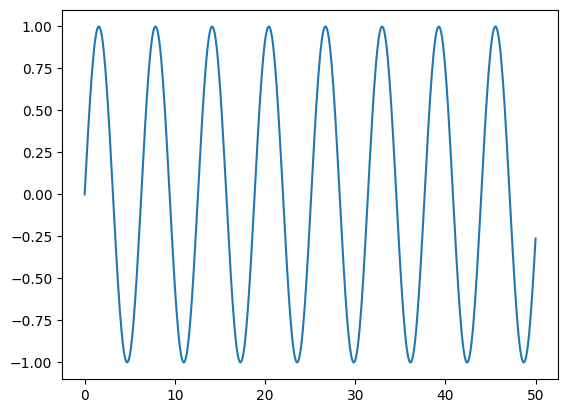

In [118]:
plt.plot(x, y);

In [119]:
data = pd.DataFrame(y, index=x, columns=['sin(x)'])

In [120]:
ind = int(len(data) * 0.1)

In [121]:
train = data.iloc[:-ind]

In [122]:
test = data.iloc[-ind:]

In [123]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [125]:
length = 32

In [126]:
generator = k.preprocessing.sequence.TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [127]:
generator[0]

(array([[[0.49999912],
         [0.54991622],
         [0.59933458],
         [0.64776041],
         [0.69470985],
         [0.73971381],
         [0.78232262],
         [0.82211054],
         [0.85868004],
         [0.89166571],
         [0.92073798],
         [0.94560637],
         [0.9660224 ],
         [0.98178208],
         [0.99272794],
         [0.99875061],
         [0.99978993],
         [0.9958355 ],
         [0.98692684],
         [0.97315296],
         [0.95465148],
         [0.93160726],
         [0.90425056],
         [0.87285471],
         [0.83773342],
         [0.79923759],
         [0.75775187],
         [0.71369077],
         [0.66749454],
         [0.61962474],
         [0.57055969],
         [0.52078961]]]),
 array([[0.47081181]]))

In [128]:
train

,sin(x)
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [129]:
model1 = k.Sequential()
model1.add(k.layers.SimpleRNN(length, activation='relu', input_shape=(length, 1)))
model1.add(k.layers.Dense(1))
model1.compile(loss='mse', optimizer='adam')

In [130]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [131]:
validation_generator = k.preprocessing.sequence.TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [132]:
callback = k.callbacks.EarlyStopping(patience=4)

In [133]:
model1.fit_generator(generator=generator, validation_data=validation_generator, epochs=20, callbacks=[callback])

Epoch 1/20


/tmp/ipykernel_26016/1301658762.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1.fit_generator(generator=generator, validation_data=validation_generator, epochs=20, callbacks=[callback])
2023-05-08 16:17:00.458865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


419/419 [==============================] - 3s 4ms/step - loss: 0.0039 - val_loss: 1.4215e-06
Epoch 2/20
  1/419 [..............................] - ETA: 5s - loss: 2.4765e-06

2023-05-08 16:17:03.278265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


419/419 [==============================] - 1s 4ms/step - loss: 7.5832e-05 - val_loss: 1.1827e-05
Epoch 3/20
419/419 [==============================] - 2s 4ms/step - loss: 1.4269e-06 - val_loss: 2.8269e-07
Epoch 4/20
419/419 [==============================] - 2s 6ms/step - loss: 6.4341e-07 - val_loss: 1.9288e-07
Epoch 5/20
419/419 [==============================] - 2s 4ms/step - loss: 6.4048e-05 - val_loss: 3.6815e-05
Epoch 6/20
419/419 [==============================] - 2s 4ms/step - loss: 8.9531e-05 - val_loss: 1.5470e-05
Epoch 7/20
419/419 [==============================] - 1s 4ms/step - loss: 4.4848e-06 - val_loss: 7.3394e-08
Epoch 8/20
419/419 [==============================] - 2s 4ms/step - loss: 1.1689e-09 - val_loss: 7.4457e-14
Epoch 9/20
419/419 [==============================] - 2s 4ms/step - loss: 6.0251e-12 - val_loss: 4.5112e-11
Epoch 10/20
419/419 [==============================] - 1s 3ms/step - loss: 5.6549e-07 - val_loss: 1.7701e-06
Epoch 11/20
419/419 [=================

<Axes: >

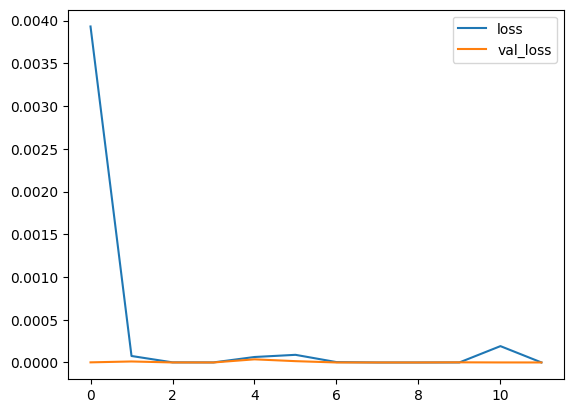

In [134]:
pd.DataFrame(model1.history.history).plot()

In [135]:
test_predictions1 = []
batch_test = scaled_train[-length:].reshape(1, length, 1)
for _ in range(len(test)):
    predicted = model1.predict(batch_test)
    test_predictions1.append(predicted)
    batch_test = np.append(batch_test[:, 1:, :], [predicted], axis=1)

1/1 [==============================] - 0s 42ms/step


In [136]:
test_predictions1 = np.array(test_predictions1).reshape(50, 1)

In [137]:
test_predictions1 = scaler.inverse_transform(test_predictions1)

In [138]:
test_df = pd.DataFrame(test)
pred_df1 = pd.DataFrame(test_predictions1, index=test_df.index, columns=['simpleRNN'])

<Axes: >

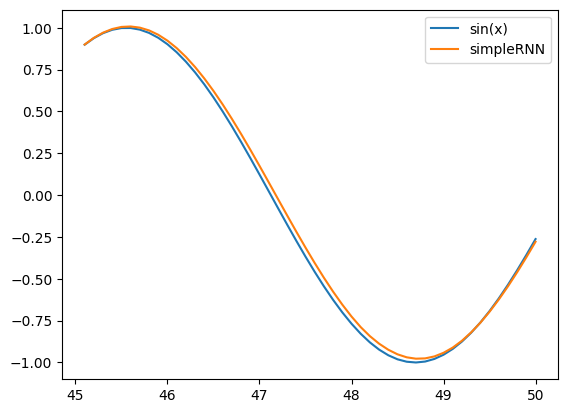

In [139]:
ax = test_df.plot()
pred_df1.plot(ax=ax)

In [140]:
model2 = k.Sequential()
model2.add(k.layers.LSTM(length, activation='relu', input_shape=(length, 1)))
model2.add(k.layers.Dense(1))
model2.compile(loss='mse', optimizer='adam')

In [141]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                4352      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [142]:
model2.fit_generator(generator=generator, validation_data=validation_generator, epochs=20, callbacks=[callback])

Epoch 1/20


/tmp/ipykernel_26016/2663548147.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(generator=generator, validation_data=validation_generator, epochs=20, callbacks=[callback])
2023-05-08 16:17:25.056230: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


419/419 [==============================] - 4s 8ms/step - loss: 0.0416 - val_loss: 0.0019
Epoch 2/20


2023-05-08 16:17:29.101539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


419/419 [==============================] - 3s 7ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 3/20
419/419 [==============================] - 3s 7ms/step - loss: 4.1980e-04 - val_loss: 1.4408e-04
Epoch 4/20
419/419 [==============================] - 3s 7ms/step - loss: 4.5810e-05 - val_loss: 7.9483e-06
Epoch 5/20
419/419 [==============================] - 3s 7ms/step - loss: 5.7263e-06 - val_loss: 1.8769e-06
Epoch 6/20
419/419 [==============================] - 3s 7ms/step - loss: 2.1317e-06 - val_loss: 4.8134e-07
Epoch 7/20
419/419 [==============================] - 3s 7ms/step - loss: 5.4491e-06 - val_loss: 2.4306e-06
Epoch 8/20
419/419 [==============================] - 3s 7ms/step - loss: 4.7861e-05 - val_loss: 5.7582e-06
Epoch 9/20
419/419 [==============================] - 3s 7ms/step - loss: 2.5840e-05 - val_loss: 1.0816e-04
Epoch 10/20
419/419 [==============================] - 3s 7ms/step - loss: 8.1085e-05 - val_loss: 3.8502e-06


<Axes: >

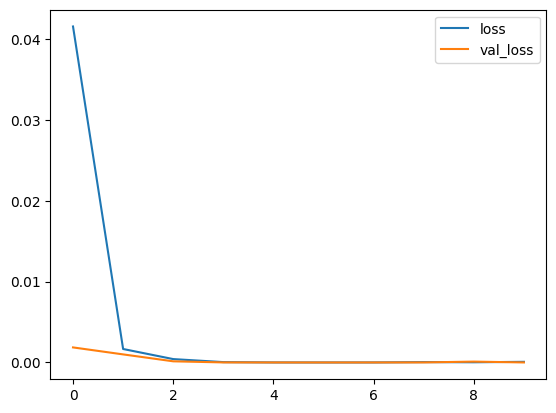

In [143]:
pd.DataFrame(model2.history.history).plot()

In [144]:
test_predictions2 = []
batch_test = scaled_train[-length:].reshape(1, length, 1)
for _ in range(len(test)):
    predicted = model2.predict(batch_test)
    test_predictions2.append(predicted)
    batch_test = np.append(batch_test[:, 1:, :], [predicted], axis=1)

1/1 [==============================] - 0s 18ms/step


In [145]:
test_predictions2 = np.array(test_predictions2).reshape(50, 1)

In [146]:
test_predictions2 = scaler.inverse_transform(test_predictions2)

In [147]:
pred_df2 = pd.DataFrame(test_predictions2, index=test_df.index, columns=['LSTM'])

<Axes: >

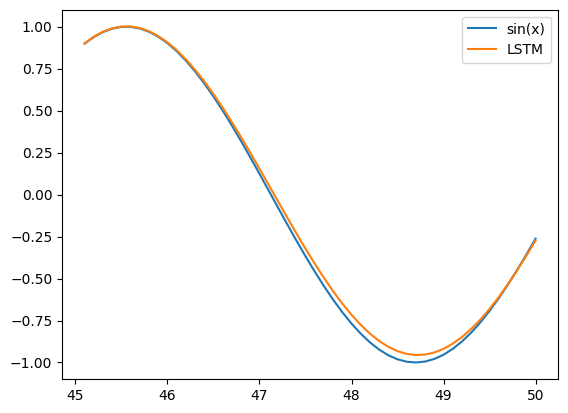

In [148]:
ax = test_df.plot()
pred_df2.plot(ax=ax)

In [149]:
model3 = k.Sequential()
model3.add(k.layers.GRU(length, activation='relu', input_shape=(length, 1)))
model3.add(k.layers.Dense(1))
model3.compile(loss='mse', optimizer='adam')

In [150]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 32)                3360      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [151]:
model3.fit_generator(generator=generator, validation_data=validation_generator, epochs=20, callbacks=[callback])

Epoch 1/20


/tmp/ipykernel_26016/1232202849.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model3.fit_generator(generator=generator, validation_data=validation_generator, epochs=20, callbacks=[callback])
2023-05-08 16:18:00.825655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


419/419 [==============================] - 5s 9ms/step - loss: 0.0240 - val_loss: 0.0019
Epoch 2/20


2023-05-08 16:18:05.251688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


419/419 [==============================] - 3s 8ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 3/20
419/419 [==============================] - 3s 7ms/step - loss: 8.1333e-04 - val_loss: 2.0688e-04
Epoch 4/20
419/419 [==============================] - 4s 9ms/step - loss: 2.6924e-04 - val_loss: 2.3301e-04
Epoch 5/20
419/419 [==============================] - 3s 8ms/step - loss: 1.6336e-04 - val_loss: 1.9227e-04
Epoch 6/20
419/419 [==============================] - 3s 8ms/step - loss: 1.0656e-04 - val_loss: 1.0689e-04
Epoch 7/20
419/419 [==============================] - 3s 8ms/step - loss: 1.0711e-04 - val_loss: 6.3080e-05
Epoch 8/20
419/419 [==============================] - 3s 8ms/step - loss: 7.5783e-05 - val_loss: 4.3057e-05
Epoch 9/20
419/419 [==============================] - 3s 8ms/step - loss: 5.5383e-05 - val_loss: 5.1664e-05
Epoch 10/20
419/419 [==============================] - 3s 8ms/step - loss: 3.4411e-05 - val_loss: 1.1279e-05
Epoch 11/20
419/419 [=========================

<Axes: >

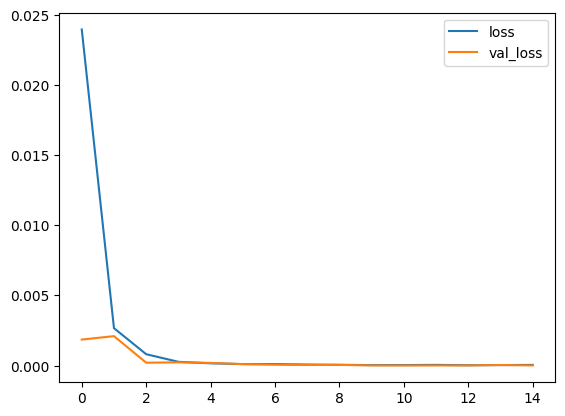

In [152]:
pd.DataFrame(model3.history.history).plot()

In [153]:
test_predictions3 = []
batch_test = scaled_train[-length:].reshape(1, length, 1)
for _ in range(len(test)):
    predicted = model3.predict(batch_test)
    test_predictions3.append(predicted)
    batch_test = np.append(batch_test[:, 1:, :], [predicted], axis=1)

1/1 [==============================] - 0s 21ms/step


In [154]:
test_predictions3 = np.array(test_predictions3).reshape(50, 1)

In [155]:
test_predictions3 = scaler.inverse_transform(test_predictions3)

In [156]:
pred_df3 = pd.DataFrame(test_predictions3, index=test_df.index, columns=['GRU'])

<Axes: >

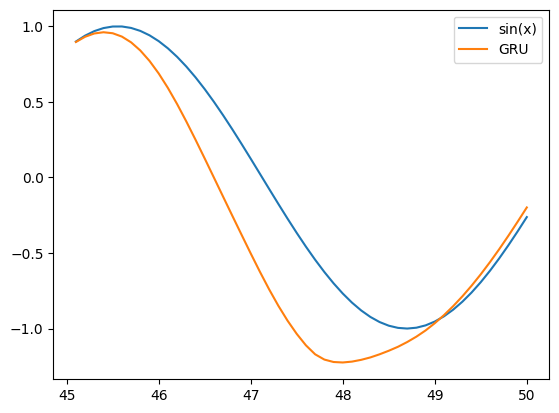

In [157]:
ax = test_df.plot()
pred_df3.plot(ax=ax)

<Axes: >

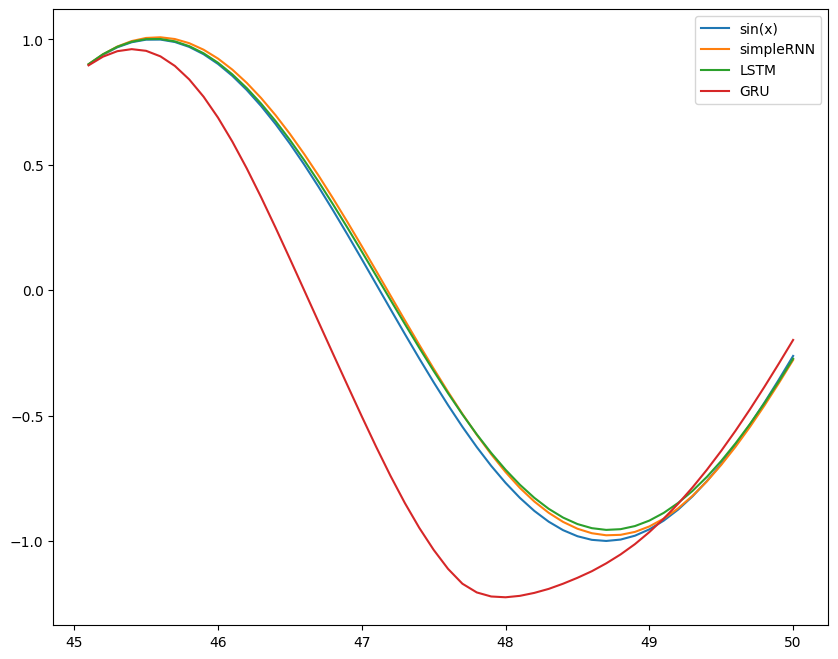

In [158]:
ax = test_df.plot(figsize=(10, 8))
pred_df1.plot(ax=ax)
pred_df2.plot(ax=ax)
pred_df3.plot(ax=ax)

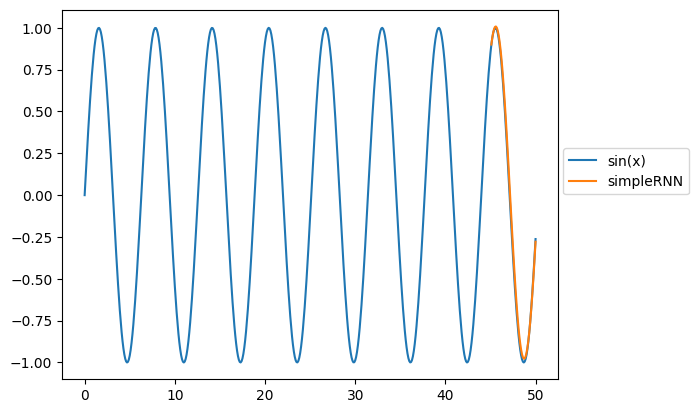

In [160]:
ax = data.plot()
pred_df1.plot(ax=ax)
plt.legend(loc=(1.01, 0.5))